# Understanding Descriptive Statistics

Import the necessary libraries here:

In [13]:
import pandas as pd
import random
import matplotlib
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [11]:
def roll_ten():
    return [random.choice(range(1,7)) for roll in range(10)]

df = pd.DataFrame(roll_ten(), columns = ['Roll'])
df

,Roll
0,1
1,1
2,5
3,1
4,3
5,4
6,6
7,4
8,3
9,2


In [4]:
list(range(1,7))
[random.choice(range(1,7)) for roll in range(10)]

[1, 4, 6, 3, 2, 2, 1, 1, 5, 1]

#### 2.- Plot the results sorted by value.

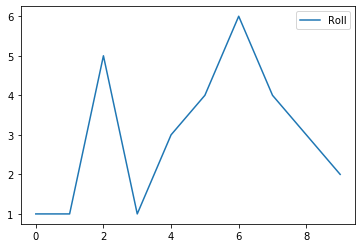

In [17]:
#df.sort_values(['Roll'])

df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDD8215E88>]],
      dtype=object)

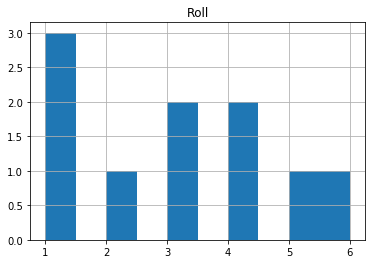

In [18]:
df.hist()

In [ ]:
"""
The first diagram represents the result of each roll 
while the second one represents the frequency of each possible outcome of a roll."""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [27]:
def mean_calc(lst):
    return (sum(lst)/len(lst))


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [36]:
freq = {}
for i in range(1,7):
    freq[i] = list(df['Roll']).count(i)
freq

mean_freq = []
for i in list(freq.values()):
    mean_freq.append(i/10)
mean_freq

freq_mean = {}
for i in range(1,7):
    freq_mean[i] = mean_freq[i-1]
freq_mean



{1: 0.3, 2: 0.1, 3: 0.2, 4: 0.2, 5: 0.1, 6: 0.1}

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [49]:
def median_calc(lst):
    if len(lst)%2 == 0:
        return (lst[int((len(lst)/2)-1)] + lst[int(len(lst)/2)])/2
    else:
        return lst[int((len(lst)-1)/2)]

#median_calc([1,2,3,4,5,6])
#int((len([1,2,3,4,5,6,7])+1)/2)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [117]:
"""def quartiles_calc(l):
    if len(l)%2 == 0:
        if len(l)%4 == 0:
            print('Q1:',(l[int((len(l)/4)-1)] + l[int(len(l)/4)])/2)
            print('Q2:',(l[int((len(l)/2)-1)] + l[int(len(l)/2)])/2)
            print('Q3:',(l[-int((len(l)/4)+1)] + l[-int(len(l)/4)])/2)
        else:
            print('Q1:',l[int(len(l)/4)])
            print('Q2:',(l[int((len(l)/2)-1)] + l[int(len(l)/2)])/2)
            print('Q3:',l[-int((len(l)/4)+1)])
    else:
        if len(l)%4 == 0:
            print('Q1:',(l[int((len(l)/4)-1)] + l[int(len(l)/4)])/2)
            print('Q2:',l[int(len(l)/2)])
            print('Q3:',(l[-int((len(l)/4)+1)] + l[-int(len(l)/4)])/2)
        else:
            print('Q1:',l[int(len(l)/4)])
            print('Q2:',l[int(len(l)/2)])
            print('Q3:',l[-int((len(l)/4)+1)])

"""
def quartiles_calc(l):
    if len(l)%2 == 0:
        print('Q2:',(l[int((len(l)/2)-1)] + l[int(len(l)/2)])/2)
    else:
        print('Q2:',l[int(len(l)/2)])

    if len(l)%4 == 0:
        print('Q1:',(l[int((len(l)/4)-1)] + l[int(len(l)/4)])/2)
        print('Q3:',(l[-int((len(l)/4)+1)] + l[-int(len(l)/4)])/2)
    else:
        print('Q1:',l[int(len(l)/4)])
        print('Q3:',l[-int((len(l)/4)+1)])
        

lst1 = [i for i in range(1,11)] #even
lst2 = [i for i in range(1,12)] #odd

quartiles_calc(lst1)
#quartiles_calc(lst2)



Q2: 5.5
Q1: 3
Q3: 8


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

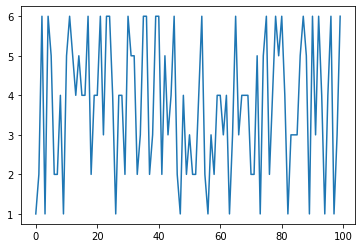

In [67]:
roll_hundred = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Descriptive-Stats\\data\\roll_the_dice_hundred.csv')

roll_hundred.sort_values(['value'])

#roll_hundred['value'].hist()
roll_hundred['value'].plot()

In [ ]:
"""
We need to use the hist function in order to see the distribution of each result of a dice roll.
Using the plot function will give us an odly shaped graph who returns the result of each dice roll,
so this is not really relevant imo
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [63]:
mean_calc(list(roll_hundred['value']))

3.74

#### 3.- Now, calculate the frequency distribution.


In [98]:
freq = {}
for i in range(1,7):
    freq[i] = (list(roll_hundred['value']).count(i))/100
    
freq

{1: 0.12, 2: 0.17, 3: 0.14, 4: 0.22, 5: 0.12, 6: 0.23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

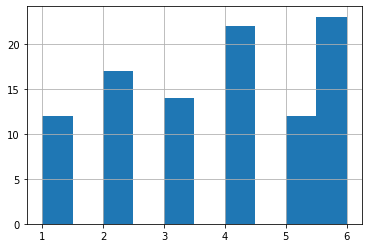

In [68]:
roll_hundred['value'].hist()

In [ ]:
"""
This histogram shows us the number of times when a roll dice result in each of its side.
Using the histogram, the mean is : 
= (1 * frequency of ones 
+ 2 * frequency of twos
+ 3 * frequency of threes
+ 4 * frequency of fours
+ 5 * frequency of fives
+ 6 * frequency of sixes) / total of rolls (100)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

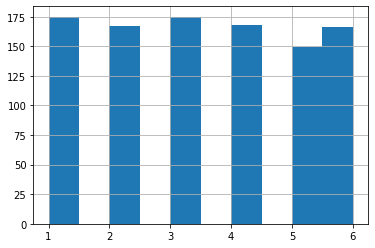

In [99]:
roll_thousand = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Descriptive-Stats\\data\\roll_the_dice_thousand.csv')
roll_thousand

freq = {}
for i in range(1,7):
    freq[i] = (list(roll_thousand['value']).count(i))/1000
freq


roll_thousand['value'].hist()

In [ ]:
"""
The distribution here is more equal, 
this is due to a larger number of repetition which tend to equal to 
the probability of each results, 1/6
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

{1.0: 0.002, 2.0: 0.002, 4.0: 0.001, 5.0: 0.002, 6.0: 0.002, 7.0: 0.001, 8.0: 0.005, 9.0: 0.002, 10.0: 0.003, 11.0: 0.003, 12.0: 0.011, 13.0: 0.006, 14.0: 0.01, 15.0: 0.008, 16.0: 0.008, 17.0: 0.01, 18.0: 0.007, 19.0: 0.011, 20.0: 0.013, 21.0: 0.014, 22.0: 0.016, 23.0: 0.017, 24.0: 0.018, 25.0: 0.019, 26.0: 0.023, 27.0: 0.025, 28.0: 0.02, 29.0: 0.026, 30.0: 0.034, 31.0: 0.024, 32.0: 0.03, 33.0: 0.022, 34.0: 0.029, 35.0: 0.033, 36.0: 0.031, 37.0: 0.03, 38.0: 0.03, 39.0: 0.045, 40.0: 0.027, 41.0: 0.036, 42.0: 0.032, 43.0: 0.032, 44.0: 0.023, 45.0: 0.029, 46.0: 0.023, 47.0: 0.017, 48.0: 0.019, 49.0: 0.019, 50.0: 0.016, 51.0: 0.009, 52.0: 0.014, 53.0: 0.012, 54.0: 0.013, 55.0: 0.013, 56.0: 0.015, 57.0: 0.007, 58.0: 0.007, 59.0: 0.008, 60.0: 0.004, 61.0: 0.002, 62.0: 0.004, 63.0: 0.007, 64.0: 0.002, 65.0: 0.002, 66.0: 0.003, 67.0: 0.004, 68.0: 0.003, 69.0: 0.001, 70.0: 0.001, 71.0: 0.001, 73.0: 0.001, 82.0: 0.001}


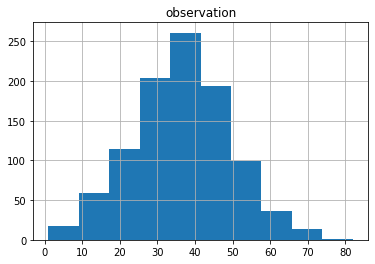

In [89]:
ages_population = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Descriptive-Stats\\data\\ages_population.csv')
ages_population.hist()

unique = []
for age in list(ages_population['observation']):
    if age not in unique:
        unique.append(age)
unique = sorted(unique)
freq_d = {}
for age in unique:
    freq_d[age] = list(ages_population['observation']).count(age)/len(list(ages_population['observation']))

print(freq_d)


In [82]:
#It appears that the mean should be around 35 and 40 years old. 
#The std might be in a range of +/- 10 years (biggest distribution between 30 and 50 years old).

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [92]:
mean_calc(list(ages_population['observation']))

import numpy as np
np.std(list(ages_population['observation']))

12.810089773299795

In [ ]:
"""
My guess was accurate for the mean, but I underestimated the std. 
It is more spread out by 2 years.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

{19.0: 0.003, 20.0: 0.013, 21.0: 0.017, 22.0: 0.035, 23.0: 0.041, 24.0: 0.078, 25.0: 0.098, 26.0: 0.12, 27.0: 0.125, 28.0: 0.139, 29.0: 0.115, 30.0: 0.09, 31.0: 0.061, 32.0: 0.031, 33.0: 0.022, 34.0: 0.007, 35.0: 0.003, 36.0: 0.002}


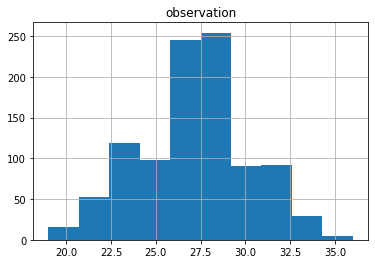

In [93]:
ages_population2 = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Descriptive-Stats\\data\\ages_population2.csv')
ages_population2.hist()

unique = []
for age in list(ages_population2['observation']):
    if age not in unique:
        unique.append(age)
unique = sorted(unique)
freq_d = {}
for age in unique:
    freq_d[age] = list(ages_population2['observation']).count(age)/len(list(ages_population2['observation']))

print(freq_d)


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
This is a youger neighborhood than the first one.
Age distribution is high around the ages 26 to 28.
It is also less spread out.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [97]:
mean_calc(list(ages_population2['observation']))

27.155

In [96]:
np.std(list(ages_population2['observation']))

2.9683286543103677

In [ ]:
"""
This sample is youger than the previous one, so logically, the range is smaller 
which is why the std is smaller as well.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDDC589408>]],
      dtype=object)

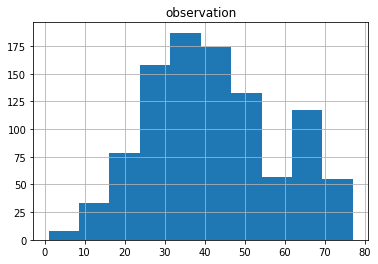

In [100]:
ages_population3 = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Descriptive-Stats\\data\\ages_population3.csv')
ages_population3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [101]:
mean_calc(list(ages_population3['observation']))

41.989

In [102]:
np.std(list(ages_population3['observation']))

16.13663158778808

In [ ]:
"""
The population is more spread out, as well as the highest distribution which is between
the age of 25 to 55, even 70 years old. That explain the higher std here.                          """

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [113]:
quartiles_calc(sorted(list(ages_population3['observation'])))

Q1: 30.0
Q2: 40.0
Q3: 53.0


In [ ]:
"""
Here, 50% of the sample is aged between 30 and 53 years old which is a 23 years gap. 
That confirms the previous graph where we've seen the large spread. 
There is less than 2 years difference between the median and the mean.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [116]:
np.percentile(sorted(list(ages_population3['observation'])), 10)

np.percentile(sorted(list(ages_population3['observation'])), 80)
max(list(ages_population3['observation']))

77.0

In [ ]:
"""
Here, we see that 90% of this sample is aged over 22 years old, that explain the 'high' mean age
of this sample.
Also, 20% of this sample is aged over 27 years old.

So 10% is aged between 0 and 22, while 20% is aged between 57 and 77. So for the same gap,
there twice as much older people than younger people.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""